In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
iris = datasets.load_iris()
features = pd.DataFrame(iris.data)
label = pd.DataFrame(iris.target)

In [3]:
def row_num (dataframe):
    row = []
    for i in range(len(dataframe)):
        row.append(i)
    dataframe['row_num'] = row
    return dataframe

In [4]:
row_num(features)
row_num(label)

,0,row_num
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
145,2,145
146,2,146
147,2,147
148,2,148


In [5]:
iris_full = features.merge(right=label,
               how='left',
               on='row_num')

iris_full.drop(columns='row_num',axis=1,inplace=True)

columns = ['x1','x2','x3','x4','label']
iris_full = iris_full.set_axis(columns,axis=1)

In [6]:
x = iris_full[['x3','x4']]
y = iris_full['label']

## Split to training and test data, then scale the features

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [8]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [9]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Fit a logistic regression model to the iris dataset

In [10]:
lr = LogisticRegression(C=100,solver='lbfgs',multi_class='ovr')
lr.fit(x_train_std,y_train)

d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [11]:
def plot_decision_regions (X,y, classifier,test_idx=None,resolution=0.2):
    markers = ('o','x','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Plotting the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    lab = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'class {cl}',
                    edgecolors = 'black')
        
    if test_idx:
        X_test,y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1],
                    c='none',edgecolor='black',alpha=1.0,
                    linewidths=1,marker='o',
                    s=100,label='Test set')
    

In [12]:
X_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))

C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


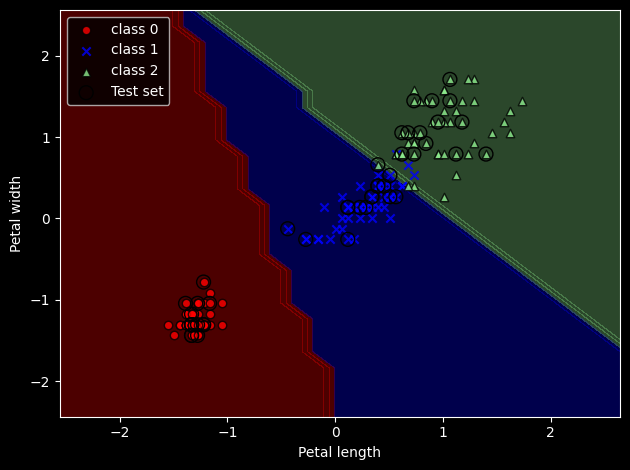

In [13]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
lr.predict_proba(x_test_std[:5,])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14],
       [1.75920545e-05, 6.94312760e-01, 3.05669648e-01],
       [1.32878990e-04, 9.82996696e-01, 1.68704253e-02]])

In [15]:
lr.predict(x_test_std[:5,])

array([2, 0, 0, 1, 1])

## Regularization 

d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\PythonLearning\ML_with_Pytorch_sklear

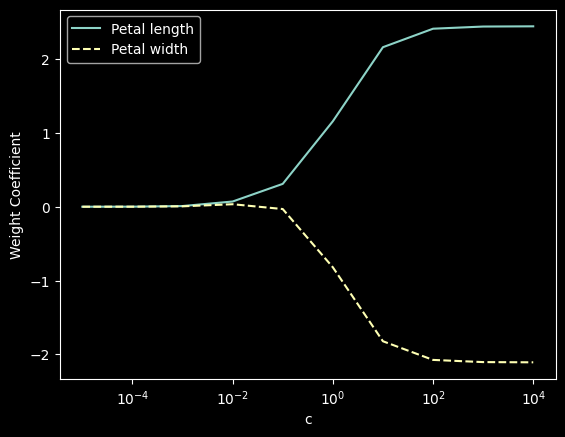

In [16]:
weights, params = [],[]

for c in np.arange(-5,5):
    lr=LogisticRegression(C = 10.**c,
                          multi_class='ovr')
    lr.fit(x_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params,weights[:,0],label='Petal length')
plt.plot(params,weights[:,1], linestyle = '--', label = 'Petal width')
plt.ylabel('Weight Coefficient')
plt.xlabel('c')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# SVM

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train_std,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


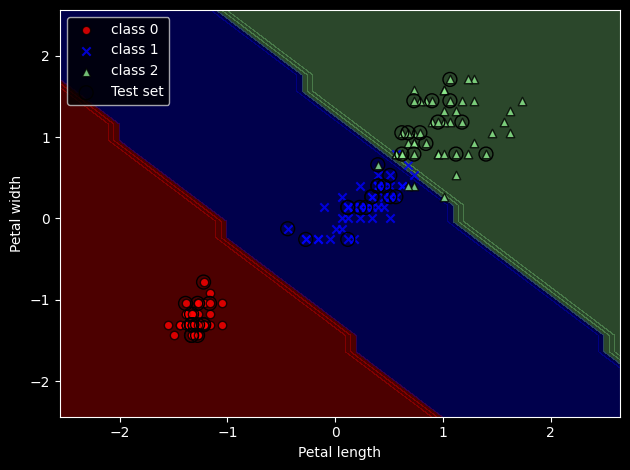

In [18]:
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
10**2

100

## Non linearly separable classes

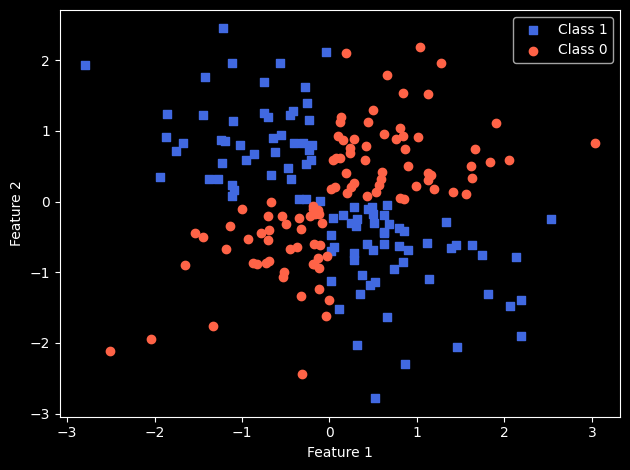

In [20]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)

y_xor = np.where(y_xor,1,0)

plt.scatter(X_xor[y_xor == 1,0],
            X_xor[y_xor == 1,1],
            c='royalblue',
            marker='s',
            label='Class 1')

plt.scatter(X_xor[y_xor == 0,0],
            X_xor[y_xor == 0,1],
            c='tomato',
            marker='o',
            label='Class 0')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


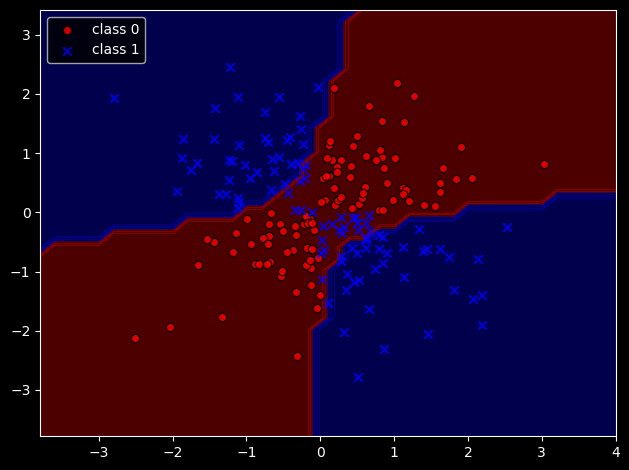

In [21]:
## svm using the rbf kernel on the above created data (rbf = radial basis function)

svm2 = SVC(kernel='rbf',random_state=1,gamma=0.05,C=10)
svm2.fit(X_xor,y_xor)

plot_decision_regions(X_xor,y_xor,classifier=svm2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision tree classifiers

d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


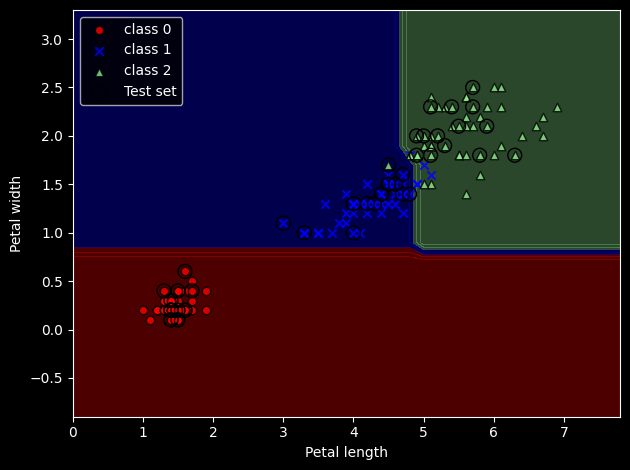

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4,
                                    random_state=1)

tree_model.fit(x_train,y_train)

x_combined=np.vstack((x_train,x_test))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(x_combined,y_combined,classifier=tree_model, test_idx=range(105,150))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

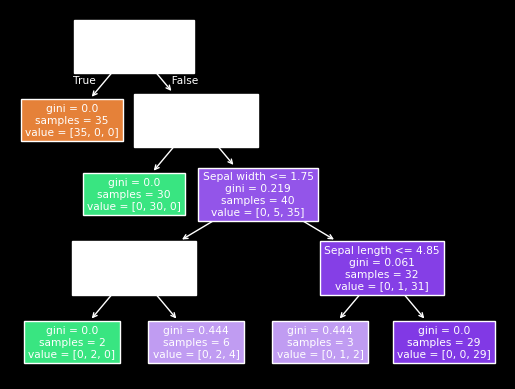

In [24]:
## visualizing the decision tree

from sklearn import tree

feature_names = ['Sepal length','Sepal width','Petal length','Petal width']

tree.plot_tree(tree_model,feature_names=feature_names,filled=True)

plt.show()

d:\PythonLearning\ML_with_Pytorch_sklearn\.venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


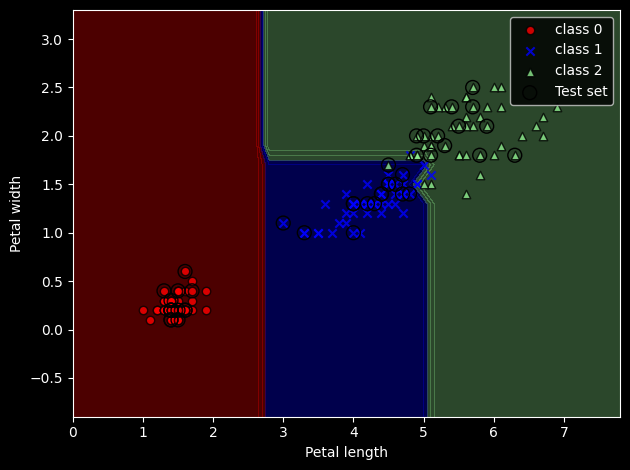

In [25]:
## Constructing a random forest classifier using sklearn
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(x_train,y_train)

plot_decision_regions(x_combined,y_combined,
                      classifier=forest,
                      test_idx=range(105,150))

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# KNN (k-nearest neighbors)

C:\Users\chris\AppData\Local\Temp\ipykernel_6256\4260748146.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl,0],


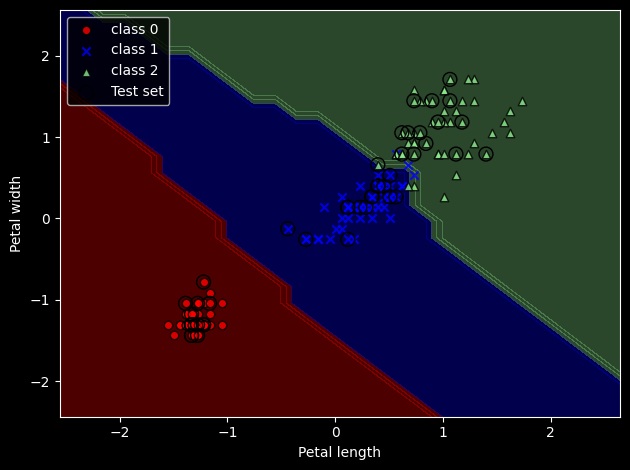

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(x_train_std,y_train)

plot_decision_regions(X_combined_std,y_combined,classifier=knn,test_idx=range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='best')
plt.tight_layout()
plt.show()